# Module 4: Evaluation Metrics for Classification

This notebook contains an exploration into methods for evaluating performance of binary classification problems.

## 4.1 Evaluation metrics: session overview

In the last module we looked at a binary classification problem (churn prediction) where we evaluated the model performance based on accuracy. In this module we will dive into what other metrics can be used to evaluate binary classification model performance.

First we will implement the model we built in the last module, and this will be the starting point of our analysis.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../03_Classification/data/Customer-Churn-Dataset.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/shanice/projects/ml-zoomcamp/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()



np.float64(0.801277501774308)

## 4.2 Accuracy and dummy model

In [8]:
len(y_val)

1409

In [9]:
# Accuracy
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [10]:
(y_val == churn_decision).sum()

np.int64(1129)

In [11]:
1129/1409

0.801277501774308

What happens to accuracy if we move our decision boundary?

In [12]:
# Create an array of values for thresholds between O and 1
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [13]:
threshold_accuracies = {}
for t in thresholds:
    churn_decision = (y_pred >= t)
    threshold_accuracies[t] = (y_val == churn_decision).mean()

In [14]:
threshold_accuracies

{np.float64(0.0): np.float64(0.2739531582682754),
 np.float64(0.05): np.float64(0.5088715400993612),
 np.float64(0.1): np.float64(0.5982966643009227),
 np.float64(0.15000000000000002): np.float64(0.6635911994322214),
 np.float64(0.2): np.float64(0.7068843151171044),
 np.float64(0.25): np.float64(0.7374024130589071),
 np.float64(0.30000000000000004): np.float64(0.759403832505323),
 np.float64(0.35000000000000003): np.float64(0.765791341376863),
 np.float64(0.4): np.float64(0.7799858055358411),
 np.float64(0.45): np.float64(0.7934705464868701),
 np.float64(0.5): np.float64(0.801277501774308),
 np.float64(0.55): np.float64(0.7984386089425124),
 np.float64(0.6000000000000001): np.float64(0.7970191625266146),
 np.float64(0.65): np.float64(0.7842441447835344),
 np.float64(0.7000000000000001): np.float64(0.7650816181689141),
 np.float64(0.75): np.float64(0.7437899219304471),
 np.float64(0.8): np.float64(0.7295954577714692),
 np.float64(0.8500000000000001): np.float64(0.7260468417317246),
 np.

In [15]:
threshold_df = pd.DataFrame.from_dict(threshold_accuracies, orient='index',
                                      columns=['accuracy'])

In [16]:
threshold_df

,accuracy
0.00,0.273953
0.05,0.508872
0.10,0.598297
0.15,0.663591
0.20,0.706884
0.25,0.737402
0.30,0.759404
0.35,0.765791
0.40,0.779986
0.45,0.793471


Text(0.5, 1.0, 'Decision Threshold v Validation Accuracy')

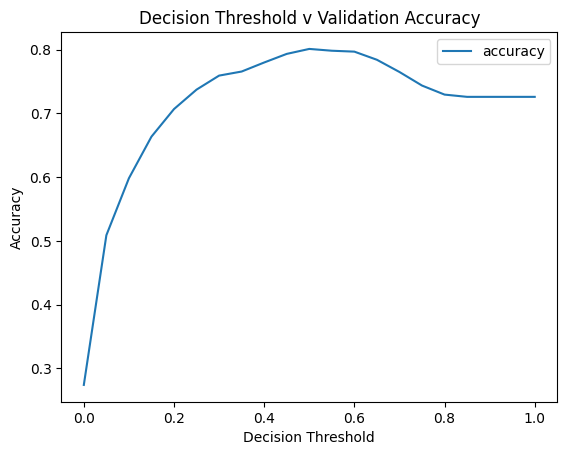

In [17]:
sns.lineplot(threshold_df)
plt.xlabel("Decision Threshold")
plt.ylabel("Accuracy")
plt.title("Decision Threshold v Validation Accuracy")

It turns out we used the best threshold i.e. the one that results in the best accuracy.

In this case we also implemented our own accuracy, however there is a scikit-learn package that will do that for us.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [20]:
thresholds = np.linspace(0, 1, 21)

threshold_accuracies = {}
for t in thresholds:
    threshold_accuracies[t] = accuracy_score(y_val, y_pred >= t)

When we look at these threshold accuracies, if we predict that all users with a prediction probability more than 1 will churn, all users will not churn. In this case Dummy model still results in a 73% accuracy. This is because we have a class inbalance where most users don't churn. In cases like this, accuracy is not the best method for accessing model performance.

## 4.3 Confusion Table

In [21]:
actual_postitive = (y_val == 1)
actual_negative = (y_val == 0)

In [22]:
t = 0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)

In [23]:
# Return an array where true if both pred and actual are true
pred_positive & actual_postitive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [24]:
tp = (pred_positive & actual_postitive).sum()
tn = (pred_negative & actual_negative).sum()

In [25]:
tp, tn

(np.int64(214), np.int64(915))

In [26]:
fp = (pred_positive & actual_negative).sum()
fn = (pred_negative & actual_postitive).sum()

In [27]:
fp, fn

(np.int64(108), np.int64(172))

In [28]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [29]:
confusion_matrix / confusion_matrix.sum()

array([[0.64939674, 0.07665011],
       [0.12207239, 0.15188077]])

Accuracy is a sum of the true negative and true positives.

Can also implement confusion matrix with sklearn.

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_val, (y_pred>= 0.5))

array([[915, 108],
       [172, 214]])

## 4.4 Precision and Recall

**Precision** tells us how many positive predictions turned out to be correct: `TP / TP + FP`

**Recall** tells us how many positive predictions were made when compared to all positive actual outcomes: `TP / TP + FN` or `TP / # of Positive actual observations`


In [33]:
# Precision
precision = tp / (tp + fp)
precision

np.float64(0.6645962732919255)

We only correctly identified 66% of churning users predictions.

In [34]:
# Recall
recall = tp / (tp + fn)
recall

np.float64(0.5544041450777202)

This recall tells us that we only correctly identified 55% of positive observations.

For the purpose of identifying churning users, accuracy alone is not sufficient. Precision and recall tells another story.

## 4.5 ROC Curves



## 4.6 ROC AUC

## 4.7 Cross Validation 